# ECSE415 - Intro to Computer Vision
## Assignment 1 - Image Filtering
### Alexander Harris - 260688155

# 1. Filtering 
## 1.2 Sharpening

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage import measure as skimg

# Import original image
img = cv2.imread('data/rice.png')

# Compute both blurred images
box_img = cv2.boxFilter(img, -1, (5,5))
gaussian_img = cv2.GaussianBlur(img, (5,5), math.sqrt(2))

### 1.1.2 Comparing sharpening methods

In [2]:
# Sharpen using box filter image
box_details = cv2.subtract(img, box_img)
sharp_box_img = cv2.addWeighted(img, 1.0, box_details, 1.5, 0)

In [3]:
# Sharpen using Gaussian filter image
gaussian_details = cv2.subtract(img, gaussian_img)
sharp_gaussian_img = cv2.addWeighted(img, 1.0, gaussian_details, 1.5, 0)

We expect the box blurred image to give a better result as it is applied more evenly to the entire image, while a Gaussian filter gives a higher weight to pixels near the center of the image.

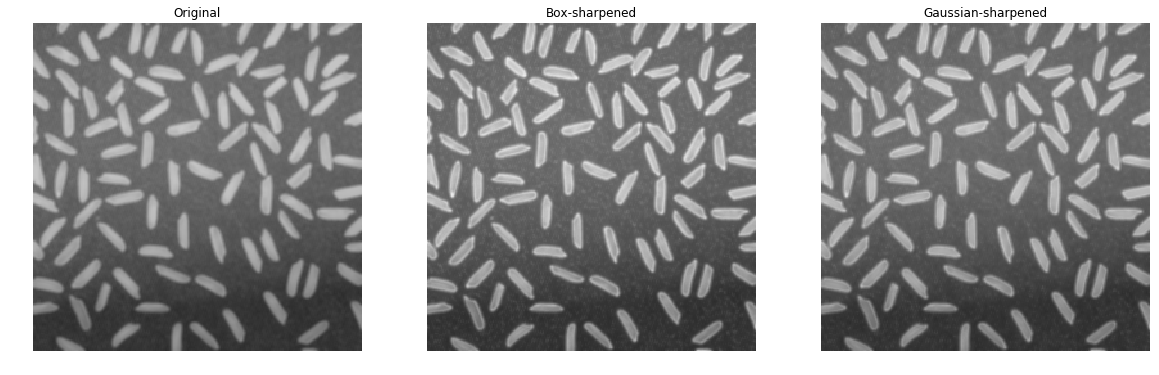

In [4]:
# Display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original'), plt.axis('off')
plt.subplot(132), plt.imshow(cv2.cvtColor(sharp_box_img, cv2.COLOR_BGR2RGB))
plt.title('Box-sharpened'), plt.axis('off')
plt.subplot(133), plt.imshow(cv2.cvtColor(sharp_gaussian_img, cv2.COLOR_BGR2RGB))
plt.title('Gaussian-sharpened'), plt.axis('off')
plt.show()

In [5]:
# Compare PSNR using original image as baseline
psnr_box = skimg.compare_psnr(img, sharp_box_img)
psnr_gaussian = skimg.compare_psnr(img, sharp_gaussian_img)
print('Gaussian PSNR: %f' % psnr_gaussian)
print('Median PSNR: %f' % psnr_box)

Gaussian PSNR: 36.153675
Median PSNR: 30.709217


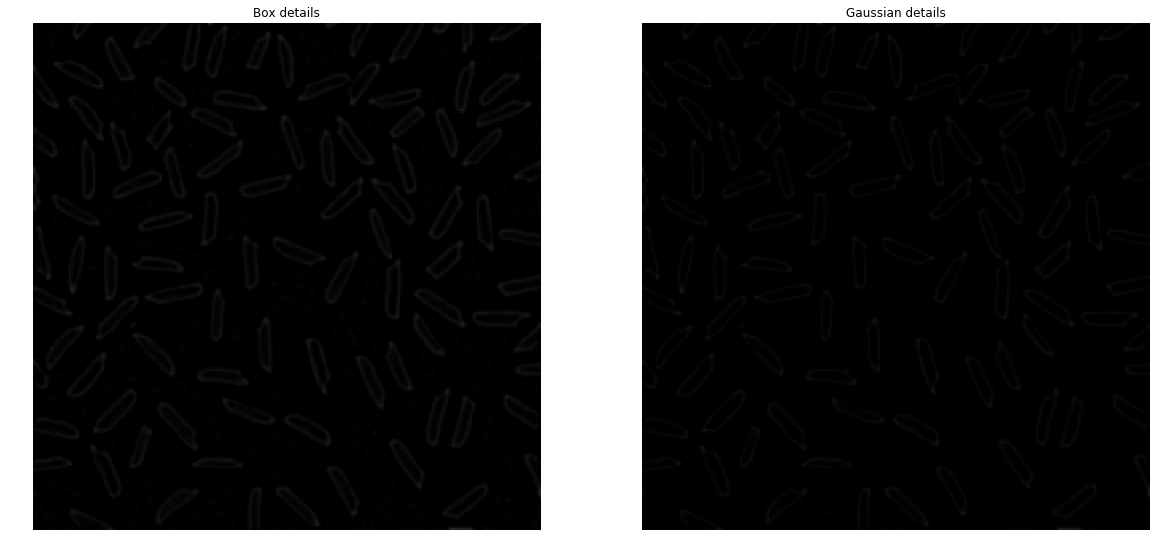

In [6]:
# Display details
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(cv2.cvtColor(box_details, cv2.COLOR_BGR2RGB))
plt.title('Box details'), plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(gaussian_details, cv2.COLOR_BGR2RGB))
plt.title('Gaussian details'), plt.axis('off')
plt.show()

We can see by observation that the box-filtered image did give a better sharpened image than the Gaussian-filtered one. We can also determine this by looking at the difference in details extracted from each image as illustrated above.